# Ejercicios PARTE A Imagenes

Desarrolla un script para leer y desplegar cada imagen con los paquetes de Matplotlib, OpenCV, Scikit-
Image y PIL.

In [1]:
!pip install pydicom

In [2]:
# Obteniendo lista de imágenes
import os 
import re
imagenes = os.listdir('Imagenes')
imagenes

['Anonymized20200210.dcm',
 'cameraman.tif',
 'house.tif',
 'IM-0001-0007.dcm',
 'lake.tif',
 'lena_color_512.tif',
 'peppers_color.tif',
 'rosa800x600.raw']

<class 'pydicom.dataset.FileDataset'>


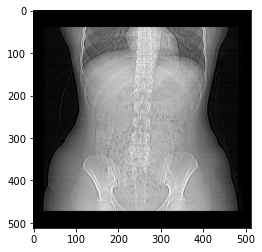

(512, 512)
<class 'numpy.ndarray'>


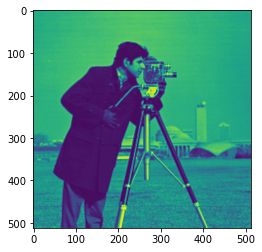

(512, 512, 4)
<class 'numpy.ndarray'>


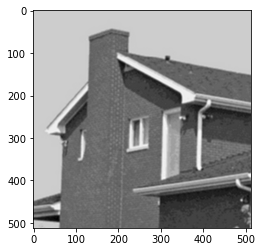

<class 'pydicom.dataset.FileDataset'>


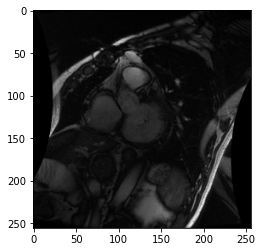

(512, 512, 4)
<class 'numpy.ndarray'>


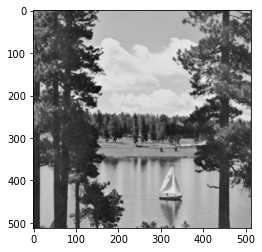

(512, 512, 3)
<class 'numpy.ndarray'>


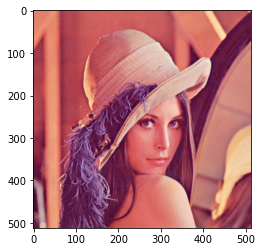

(512, 512, 4)
<class 'numpy.ndarray'>


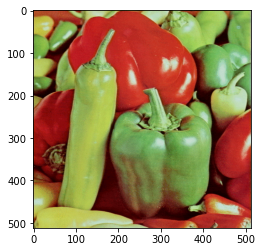

<class 'numpy.memmap'>
480000


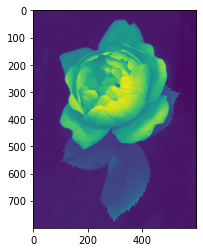

In [4]:
#Desplegar con Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import pydicom as dicom

for imagen in imagenes:
    if re.search(r'.dcm', imagen):
        ds = dicom.dcmread("Imagenes\\"+imagen)
        print(type(ds))
        plt.imshow(ds.pixel_array,cmap='gray')
    elif re.search(r'.raw', imagen):
        memmap = np.memmap('Imagenes\\'+imagen, dtype=np.uint8, shape=(800, 600,1))
        print(type(memmap))
        print(memmap.size)
        plt.imshow(memmap)
    else:
        image = img.imread("Imagenes\\"+imagen)
        print(image.shape)
        print(type(image))
        plt.imshow(image)
    plt.show()

In [5]:
!pip install opencv-python

In [59]:
#Desplegar con OpenCV
import cv2

for imagen in imagenes:
    if re.search(r'.tif', imagen):
        img = cv2.imread('Imagenes\\'+imagen)
        cv2.imshow("image", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    elif re.search(r'.raw', imagen):
        memmap = np.memmap('Imagenes\\'+imagen, dtype=np.uint8, shape=(800, 600))
        cv2.imshow("image", memmap)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    elif re.search(r'.dcm', imagen):
        #Arreglar la segunda imagen
        ds = dicom.dcmread("Imagenes\\"+imagen)
        cv2.imshow("image",ds.pixel_array)
        cv2.waitKey()
        cv2.destroyAllWindows()


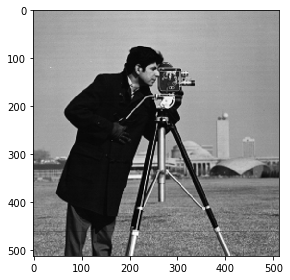

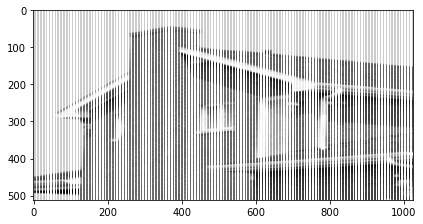

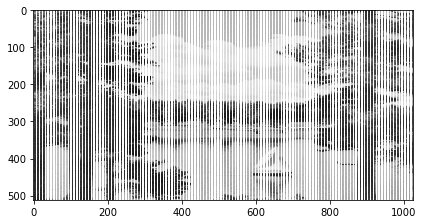

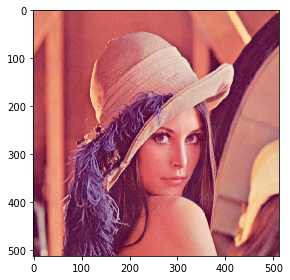

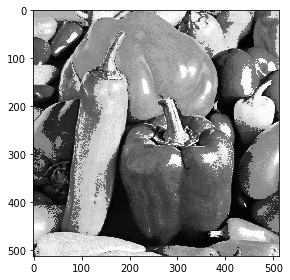

In [22]:
#Desplegar con Scikit-Image
import matplotlib.pyplot as plt
from skimage import io,color

for imagen in imagenes:
    if re.search(r'.dcm', imagen):
        ds = dicom.dcmread("Imagenes\\"+imagen)
        io.imshow(ds.pixel_array)
    elif re.search(r'.raw', imagen):
        memmap = np.memmap('Imagenes\\'+imagen, dtype=np.uint8, shape=(800, 600))
        io.imshow(memmap)
    else:
        image = io.imread("Imagenes\\"+imagen)
        #Error de dimensiones al momento de leer las imágenes
        #Error con la dimens de los peppers deben ser de color
        if image.shape == (512,512,2):
            image.shape = (512,1024)
            io.imshow(image)
        else:
            io.imshow(image)
    io.show()

In [8]:
#Desplegar con PIL
from PIL import Image

for imagen in imagenes:
    if re.search(r'.dcm', imagen):
        ds = dicom.dcmread("Imagenes\\"+imagen)
        im = Image.fromarray(ds.pixel_array)
        im.show()
    elif re.search(r'.raw', imagen):
        #Error al leer archivo .raw con PIL
        
        memmap = np.memmap('Imagenes\\'+imagen, dtype=np.uint8, shape=(800, 600,1))
        #plt.imshow(memmap)
        #im = Image.open("Imagenes\\"+imagen)
        #im.show(image)
    else:
        im = Image.open("Imagenes\\"+imagen)
        im.show()

In [18]:
import matplotlib.image as img
# 4.2.Imprimir el tipo de imagen, el tamaño y el tipo de dato
for imagen in imagenes:
    if re.search(r'.dcm', imagen):
        ds = dicom.dcmread("Imagenes\\"+imagen)
        #print('La imagen '+imagen+ 'tiene tipo .dcm, tiene dimensiones, '+ str(ds.pixel_array) + ' es de tipo de dato ' + str(type(ds)))
    elif re.search(r'.raw', imagen):
        memmap = np.memmap('Imagenes\\'+imagen, dtype=np.uint8, shape=(800, 600,1))
        print('La imagen '+imagen+ 'tiene tipo .raw, tiene dimensiones (800, 600), es de tipo de dato ' + str(memmap.dtype))
    else:
        image = img.imread("Imagenes\\"+imagen)
        print('La imagen '+imagen+ 'tiene tipo .tif, tiene dimensiones'+str(image.shape)+ ', es de tipo de dato ' + str(image.dtype))
    plt.show()

La imagen cameraman.tiftiene tipo .tif, tiene dimensiones(512, 512), es de tipo de dato uint8
La imagen house.tiftiene tipo .tif, tiene dimensiones(512, 512, 4), es de tipo de dato uint8
La imagen lake.tiftiene tipo .tif, tiene dimensiones(512, 512, 4), es de tipo de dato uint8
La imagen lena_color_512.tiftiene tipo .tif, tiene dimensiones(512, 512, 3), es de tipo de dato uint8
La imagen peppers_color.tiftiene tipo .tif, tiene dimensiones(512, 512, 4), es de tipo de dato uint8
La imagen rosa800x600.rawtiene tipo .raw, tiene dimensiones (800, 600), es de tipo de dato uint8


In [19]:
#4.3.De las imágenes “lena_color_512.tif”, “peppers_color.tif”. Desarrolla un script con OpenCV y Scikit-
#Image para cambiar el espacio de color de:
#4.3.1.RGB a Escala de grises
# OpenCV
image_route = 'Imagenes/lena_color_512.tif'
img = cv2.imread(image_route)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Imagen Original',img)
cv2.imshow('IMagen en escala de grises',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# OpenCV
image_route = 'Imagenes/peppers_color.tif'
img = cv2.imread(image_route)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Imagen Original',img)
cv2.imshow('IMagen en escala de grises',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

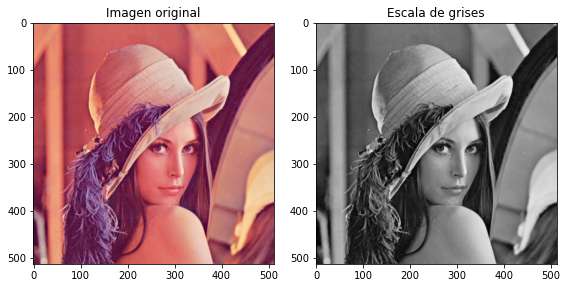

In [23]:
#Scikit-Image
image_route = 'Imagenes/lena_color_512.tif'
#img = mpimg.imread(image_route)
img = io.imread(image_route)
if len(img.shape)==3 and img.shape[2] == 2:
    print('La imagen ya esta enescala de grises c: ')
else:
    img_gray = color.rgb2gray(img)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title("Imagen original")
    ax[1].imshow(img_gray, cmap=plt.cm.gray)
    ax[1].set_title("Escala de grises")
    fig.tight_layout()
    plt.show()


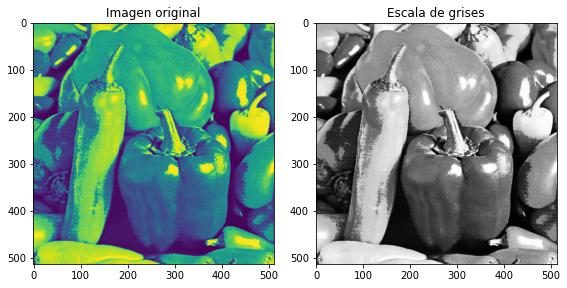

In [38]:
#Scikit-Image
image_route = 'Imagenes/peppers_color.tif'
#img = mpimg.imread(image_route)
img = io.imread(image_route)
if len(img.shape)==3 and img.shape[2] == 2:
    print('La imagen ya esta enescala de grises c: ')
else:
    #img_gray = color.rgb2gray(img)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title("Imagen original")
    ax[1].imshow(img, cmap=plt.cm.gray)
    ax[1].set_title("Escala de grises")
    fig.tight_layout()
    plt.show()

In [39]:
#4.3.2.RGB a YUV
# OpenCV
image_route = 'Imagenes/lena_color_512.tif'
img = cv2.imread(image_route)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2.imshow('Imagen Original',img)
cv2.imshow('IMagen en yuv',img_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
# OpenCV
image_route = 'imagenes/peppers_color.tif'
img = cv2.imread(image_route)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2.imshow('Imagen Original',img)
cv2.imshow('IMagen en yuv',img_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


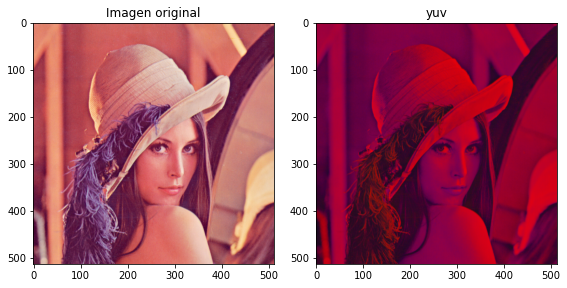

In [41]:
#Scikit-Image
image_route = 'Imagenes/lena_color_512.tif'
#img = mpimg.imread(image_route)
img = io.imread(image_route)
if len(img.shape)==3 and img.shape[2] == 2:
    print('La imagen ya esta en yuv c: ')
else:
    img_yuv = color.rgb2yuv(img)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title("Imagen original")
    ax[1].imshow(img_yuv)
    ax[1].set_title("yuv")
    fig.tight_layout()
    plt.show()

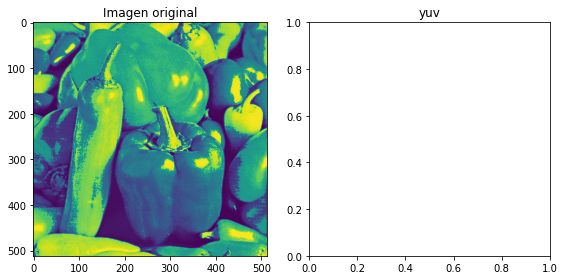

In [48]:
#Scikit-Image
image_route = 'Imagenes/peppers_color.tif'
#img = mpimg.imread(image_route)
img = io.imread(image_route)
if len(img.shape)==3 and img.shape[2] == 2:
    print('La imagen ya esta en yuv c: ')
else:
    #img_yuv = color.rgb2yuv(img)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title("Imagen original")
    #ax[1].imshow(img, cmap=plt.cm.yum)
    ax[1].set_title("yuv")
    fig.tight_layout()
    plt.show()

In [49]:
#4.3.3.RGB a HSV
# OpenCV
image_route = 'Imagenes/lena_color_512.tif'
img = cv2.imread(image_route)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('Imagen Original',img)
cv2.imshow('IMagen en hsv',img_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
# OpenCV
image_route = 'imagenes/peppers_color.tif'
img = cv2.imread(image_route)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('Imagen Original',img)
cv2.imshow('IMagen en hsv',img_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

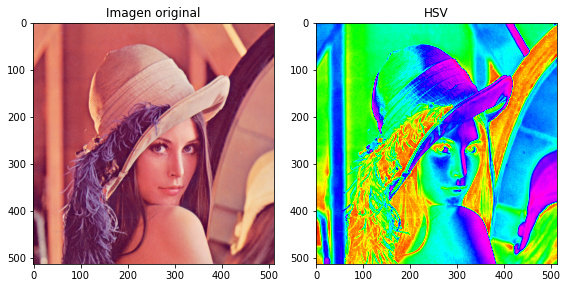

In [51]:
#Scikit-Image
image_route = 'Imagenes/lena_color_512.tif'
#img = mpimg.imread(image_route)
img = io.imread(image_route)
if len(img.shape)==3 and img.shape[2] == 2:
    print('La imagen ya esta en hsv c: ')
else:
    img_hsv = color.rgb2gray(img)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title("Imagen original")
    ax[1].imshow(img_hsv, cmap=plt.cm.hsv)
    ax[1].set_title("HSV")
    fig.tight_layout()
    plt.show()

In [ ]:
#Scikit-Image
image_route = 'imagenes/peppers_color.tif'
#img = mpimg.imread(image_route)
img = io.imread(image_route)
if len(img.shape)==3 and img.shape[2] == 2:
    print('La imagen ya esta en hsv c: ')
else:
    img_hsv = color.rgb2gray(img)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title("Imagen original")
    ax[1].imshow(img_hsv, cmap=plt.cm.hsv)
    ax[1].set_title("HSV")
    fig.tight_layout()
    plt.show()

In [53]:
#4.4.Despliega la paleta de colores de RGB por separado, ver figura siguiente, la barra de la derecha con
#valores es la paleta de colores.

In [54]:
def RGBChannels(image_route):
    image = cv2.imread(image_route)
    # Guardamos una copia para cada canal y "quitamos" los otros dos.
    b = image.copy()
    b[:, :, 1] = 0
    b[:, :, 2] = 0
    g = image.copy()
    g[:, :, 0] = 0
    g[:, :, 2] = 0
    r = image.copy()
    r[:, :, 0] = 0
    r[:, :, 1] = 0
    cv2.imshow('B-RGB', b)
    cv2.imshow('G-RGB', g)
    cv2.imshow('R-RGB', r)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [55]:
RGBChannels('Imagenes/lena_color_512.tif')

In [56]:
#4.5.De una imagen que usted escoja, dejarla en escala de grises y procure que sea igual en renglones y en
#columnas. Programe una función que realice decimación de una imagen, reduciendola a la mitad de su
#tamaño original. Y promediando en grupos de 4 pixeles. Pruebe con su imagen.

In [57]:
def decimacion(image,ventana=2):
    if type(ventana) != int:
        print('Debes introducir un enter por ventana')
        return image
    aux = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if i %ventana==0 and j %ventana==0:
                aux.append(1/4*(image[i,j]+image[i,j+1]+image[i+1,j]+image[i+1,j+1]))
    aux2 = np.array(aux)
    new_image = aux2.reshape((image.shape[0]//ventana,image.shape[1]//ventana))
    return new_image



image_route = 'Imagenes/lena_color_512.tif'
img = cv2.imread(image_route)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Imagen en escala de grises',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
decimacion(img_gray, )

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


array([[34.  , 33.5 , 31.5 , ..., 41.  , 42.5 , 13.5 ],
       [34.  , 33.5 , 31.5 , ..., 41.  , 42.5 , 13.5 ],
       [35.  , 31.  , 31.75, ..., 30.25, 23.  , 51.75],
       ...,
       [51.  , 51.  , 53.5 , ..., 17.25, 28.5 , 27.75],
       [44.5 , 49.25, 50.5 , ..., 28.75, 37.5 , 34.  ],
       [44.  , 53.  , 50.5 , ..., 37.  , 38.  , 42.5 ]])

In [ ]:
#4.6.Convierte la imagen peppers_color.tif a escala de grises,
#4.6.1.Recortela de manera que solo quede uno de los pimientos verdes en ese recorte
#4.6.2.Guárdela en formato .jpg.

In [58]:
peppers = cv2.imread('Imagenes/peppers_color.tif')
peppers_gray = cv2.cvtColor(peppers, cv2.COLOR_BGR2GRAY)
peppers_gray_cut = peppers_gray[190:470, 175:420]
cv2.imshow('peppers',peppers_gray_cut)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Imagenes/peppers_gray_cut.jpg',peppers_gray_cut)

True

In [ ]:
#4.7.Un formato de imágenes sin ningún tipo de codificación se conoce como formato crudo (RAW). De la
#imagen “rosa800x600.raw” lea y despliegue la imagen. Tome en cuenta que esta imagen maneja la
#precisión de integer8 y el tamaño es de 600x800 pixeles.

In [60]:
memmap = np.memmap('Imagenes\\'+"rosa800x600.raw", dtype=np.uint8, shape=(800, 600))
cv2.imshow("image", memmap)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Ejercicios PARTE B Iris Setosa

In [2]:
import pandas as pd

In [3]:
col_names = ['clase_1','clase_2','clase_3','clase_4','clase_5']
iris =  pd.read_csv("EjerciciosIris\\iris.data",names = col_names)
# 5.1 Impresión de los 10 primeros registros del dataframe
iris.head(10)

,clase_1,clase_2,clase_3,clase_4,clase_5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# 5.1 Descripción de los datos
iris.describe()

,clase_1,clase_2,clase_3,clase_4
count,147.000000,150.000000,150.000000,149.000000
mean,5.857823,3.054000,3.758667,1.196644
std,0.828013,0.433594,1.764420,0.765331
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# 5.1 Descripcion de los datos
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   clase_1  147 non-null    float64
 1   clase_2  150 non-null    float64
 2   clase_3  150 non-null    float64
 3   clase_4  149 non-null    float64
 4   clase_5  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
# 5.2.Imprima las llaves y el número de filas y de columnas.
iris.shape

(150, 5)

In [7]:
# 5.2.Imprima las llaves y el número de filas y de columnas.
iris.keys()

Index(['clase_1', 'clase_2', 'clase_3', 'clase_4', 'clase_5'], dtype='object')

In [8]:
# 5.3.Obtenga el número de muestras faltantes o Nan.
iris.isnull().sum()
# Hay cuatro valores nulos en los registros

clase_1    3
clase_2    0
clase_3    0
clase_4    1
clase_5    0
dtype: int64

In [9]:
# 5.4.Cree un arreglo 2-D de tamaño 5x5 con unos en la diagonal y ceros en el resto. Convierta el arreglo NumPy
# a una matriz dispersa de ScyPy en formato CRS. Nota: una matriz se considera dispersa cuando el
# porcentaje de ceros es mayor a 0.5.
import numpy as np
from scipy import sparse


A = np.zeros((5,5),int)
np.fill_diagonal(A,1)
A

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [10]:
B = sparse.csr_matrix(A) # np array to sparse matrix
print(B)

  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1
  (4, 4)	1


In [11]:
# 5.5.Muestre estadísticas básicas como percentil, media, mínimo, máximo y desviación estándar de los datos.
# Use describe para ello. Imprima sólo la media y la desviación estándar.
iris.describe()

,clase_1,clase_2,clase_3,clase_4
count,147.000000,150.000000,150.000000,149.000000
mean,5.857823,3.054000,3.758667,1.196644
std,0.828013,0.433594,1.764420,0.765331
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Regresa una serie de tiempo que podemos filtrar por registros
iris.describe().loc[['mean','std']]

,clase_1,clase_2,clase_3,clase_4
mean,5.857823,3.054000,3.758667,1.196644
std,0.828013,0.433594,1.764420,0.765331


In [13]:
# 5.6.Obtenga el número de muestras para cada clase.
iris.info()
# Número de muestras para cada clase es de 149

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   clase_1  147 non-null    float64
 1   clase_2  150 non-null    float64
 2   clase_3  150 non-null    float64
 3   clase_4  149 non-null    float64
 4   clase_5  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
# #5.7.Añada un encabezado a los datos usando los nombres en iris.names y repita el ejercicio anterior.
col_names_2 = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris_2 =  pd.read_csv("EjerciciosIris\\iris.data",names = col_names_2)

In [31]:
iris_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  147 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   149 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
# 5.8.Imprima las diez primeras filas y las dos primeras columnas del data frame usando los índices de las columnas.
iris_2.iloc[:,[0,1]].head(10)

,Sepal_Length,Sepal_Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


**Visualización**

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mínimo')

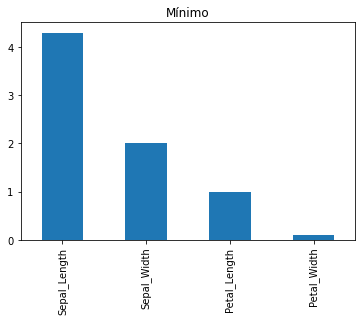

In [35]:
#5.9. Cree una gráfica de barras que muestre la media, mínimo y máximo de todos los datos.
auxiliar = iris_2.copy()
del auxiliar['Class']

iris_min = auxiliar.min()

iris_min.plot(kind='bar');
plt.title('Mínimo')

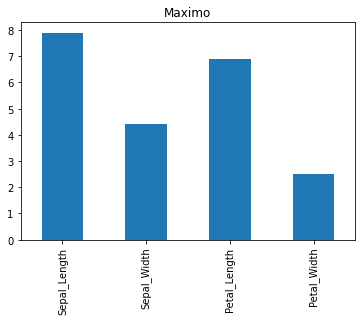

In [36]:
iris_max = auxiliar.max()

plt.title('Maximo')
iris_max.plot(kind='bar');

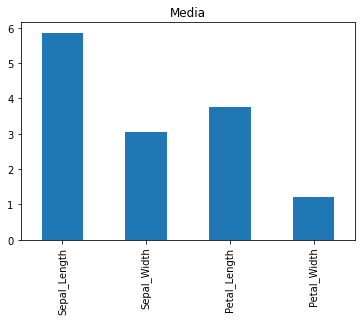

In [37]:
iris_mean = auxiliar.mean()

plt.title('Media')
iris_mean.plot(kind='bar');

<AxesSubplot:title={'center':'Clases'}, ylabel='Class'>

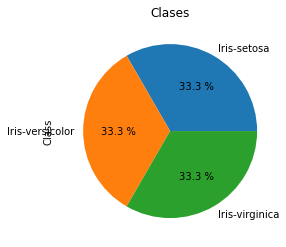

In [38]:
#5.10. Muestre la frecuencia de las tres especies como una gráfica de pastel.
serie = iris_2.Class.value_counts()
plt.title('Clases')
serie.plot.pie(autopct = "%0.1f %%")

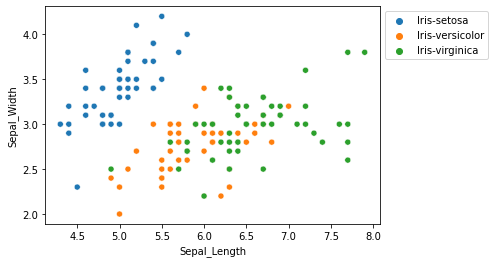

In [39]:
#5.11. Cree una gráfica que muestre la relación entre la longitud y ancho del sépalo de las tres 
#especies conjuntamente.
sns.scatterplot(x = 'Sepal_Length', y = 'Sepal_Width', 
                hue = 'Class', data = iris_2)

plt.legend(bbox_to_anchor = (1,1), loc = 2)
plt.show()

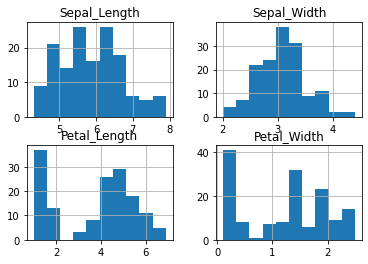

In [40]:
#5.12.Obtenga los histogramas de las variables SepalLength, SepalWidth, PetalLength y PetalWidth.
iris_2.hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

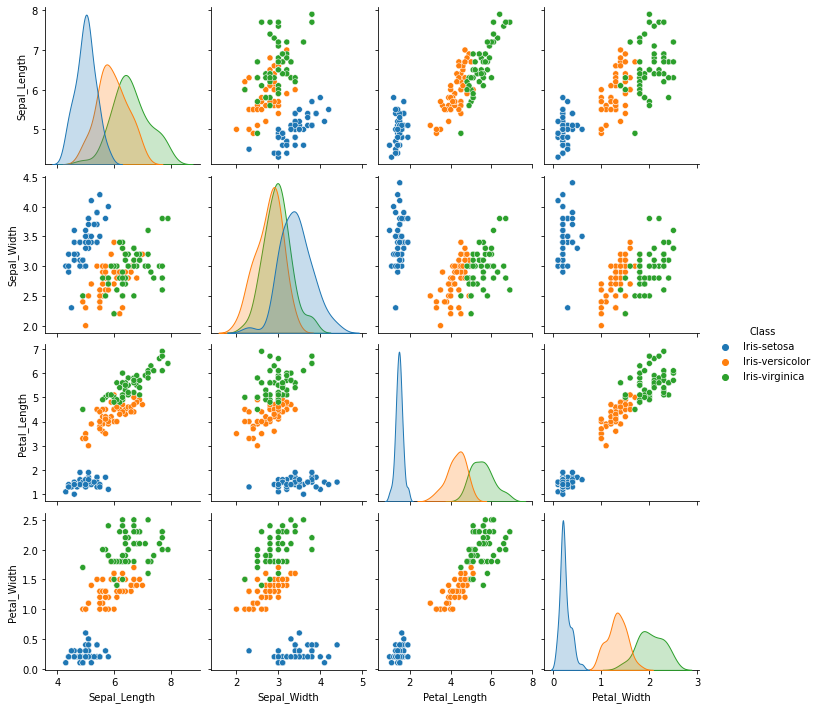

In [41]:
#5.13. Cree gráficas de dispersión usando pairplot de seaborn y muestre con distintos colores 
#las tres especies en las gráficas de dispersión.

sns.pairplot(iris_2, hue='Class')
plt.show

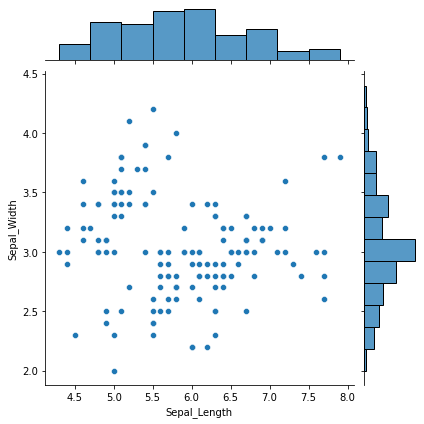

In [42]:
#5.14. Cree una gráfica usando joinplot de seaborn para mostrar la dispersión entre la longitud 
#y ancho del sépalo y las distribuciones de estas dos variables.
sns.jointplot(x="Sepal_Length", y="Sepal_Width", kind = "scatter", data = iris_2)

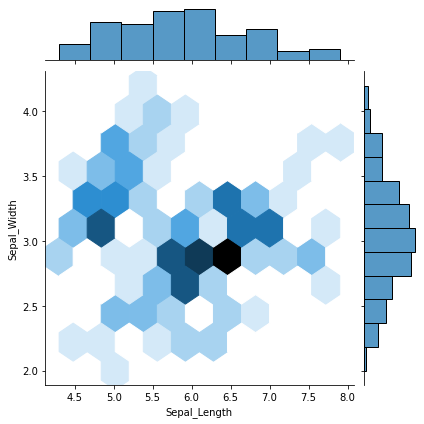

In [43]:
#5.15. Repita el ejercicio anterior, pero esta vez usando joinplot con kind="hex".
sns.jointplot(x="Sepal_Length", y="Sepal_Width", kind = "hex", data = iris_2)